<a href="https://colab.research.google.com/github/wonively523/Hands-On-Meta-Learning-With-Python/blob/master/Assignment_02_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import numpy as np
import matplotlib.pyplot as  plt
%matplotlib inline

plt.style.use(['ggplot'])

### **1. Input data**


*   a straight line that is the graph of a linear function (in blue color)
*   a set of points that have random perturbations with respect to the straight line (in black color)



In [0]:
np.random.seed(2020)

## y=2.7x +5.8 임의의 노이즈 추가
x = 2 * np.random.rand(100,1)
y = 5.8 +2.7 * x+np.random.randn(100,1)

y_o = 2.7x +5.8

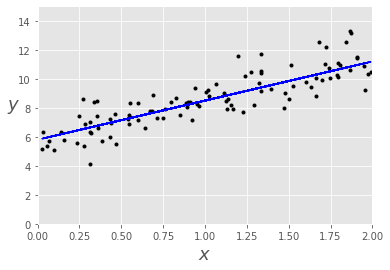

In [171]:
plt.plot(x,y,'b.', color="black")
plt.plot(x,y_o,'b-')
plt.xlabel("$x$", fontsize=18)
plt.ylabel("$y$", rotation=0, fontsize=18)
_ =plt.axis([0,2,0,15])

In [161]:
"""x_b = np.c_[np.ones((100,1)),x]
theta_best = np.linalg.inv(x_b.T.dot(x_b)).dot(x_b.T).dot(y)
print(theta_best)"""

[[5.71335255]
 [2.84752777]]


### **2. Output results**


*   the set of points that have random perturbations with respect to the straight line (in black color)

*   a straight line that is the graph of a solution obtained by linear regression (in red color)



In [0]:
def get_cost(theta,x,y):   
    m = len(y)
    
    pred = x.dot(theta)
    cost = (1/2*m) * np.sum(np.square(pred-y))
    
    return cost

In [0]:
def gradient_descent(x,y,theta,lr=0.01,iters=100):
    m = len(y)
    cost_history = np.zeros(iters)
    theta_history = np.zeros((iters,2))
 
    for it in range(iters):
        pred = np.dot(x,theta)
        theta = theta -(1/m)*lr*(x.T.dot((pred - y)))
        theta_history[it,:] =theta.T
        cost_history[it]  = get_cost(theta,x,y)
                
    return theta, cost_history, theta_history

In [165]:
lr =0.01
n_iter = 1000

theta = np.random.randn(2,1)

X_b = np.c_[np.ones((len(x),1)),x]
theta,cost_history,theta_history = gradient_descent(x_b,y,theta,lr,n_iter)


print('Theta0:          {:0.3f},\nTheta1:          {:0.3f}'.format(theta[0][0],theta[1][0]))
print('Final cost/MSE:  {:0.3f}'.format(cost_history[-1]))

Theta0:          5.101,
Theta1:          3.360
Final cost/MSE:  5402.464


In [0]:
theta0 = 5.101
thetha1 = 3.360
y_pred = thetha1 * x + theta0

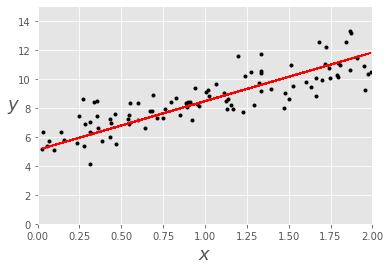

In [175]:
plt.plot(x,y,'b.', color="black")
plt.plot(x,y_pred,'r-')
plt.xlabel("$x$", fontsize=18)
plt.ylabel("$y$", rotation=0, fontsize=18)
_ =plt.axis([0,2,0,15])

### **3. Plotting the energy values**


*   the value of the objective function at every optimization step by the gradient descent algorithm (in blue color)
*   the optimization should be performed until convergence



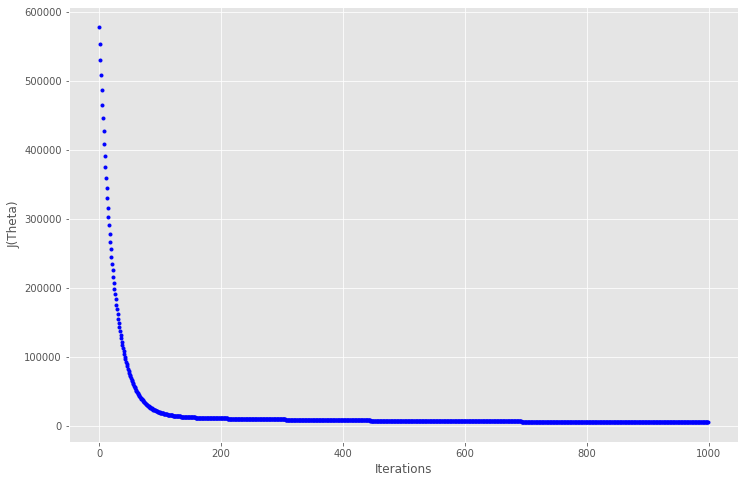

In [166]:
fig,ax = plt.subplots(figsize=(12,8))

ax.set_ylabel('J(Theta)')
ax.set_xlabel('Iterations')
_=ax.plot(range(n_iter),cost_history,'b.')

### **4. Plotting the model parameters**


*   the value of the model parameters θ0\theta_0θ0​ and θ1\theta_1θ1​ at every optimization step (in red (θ0\theta_0θ0​) and blue (θ1\theta_1θ1​) colors)
*   the optimization should be performed until convergence


In [180]:
print(theta_history)

[[-1.71815594 -0.24057402]
 [-1.61258947 -0.12323525]
 [-1.50926612 -0.0085657 ]
 ...
 [ 5.09877921  3.36134745]
 [ 5.09972512  3.36055661]
 [ 5.10066958  3.35976699]]


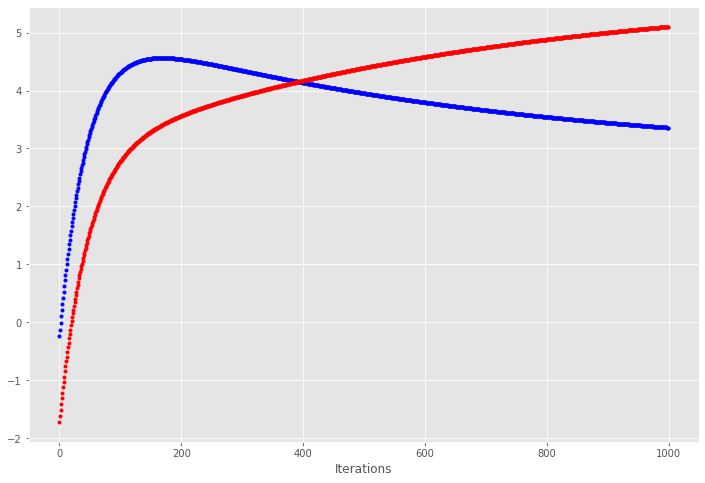

In [182]:
fig,ax = plt.subplots(figsize=(12,8))

ax.set_xlabel('Iterations')
_=ax.plot(range(n_iter),theta_history[:,1],'b.')
_=ax.plot(range(n_iter),theta_history[:,0],'r.')